In [2]:
import numpy as np
import matplotlib.pyplot as plt

##### Nonlinear fitting

In [47]:
## 임의로 함수 설정 // def f(x, a, b, c, d, e)
## ==> return a*np.sin(b*(x-c))*np.exp(-x/e)+d
npar = 5

def ff(x, p):
    if len(p) != npar:
        print("parameter is inconsistent!")
        return None
    return p[0]*np.sin(p[1]*(x-p[2]))*np.exp(-x/p[4]) + p[3]

def ff_grad(x, p):
    if len(p) != npar:
        print("parameter is incosistent!")
        return None

    grad = [
        np.sin(p[1]*(x-p[2]))*np.exp(-x/p[4]),
        p[0]*np.cos(p[1]*(x-p[2]))*(x-p[2])*np.exp(-x/p[4]),
        p[0]*np.cos(p[1]*(x-p[2]))*(-p[1])*np.exp(-x/p[4]),
        np.ones(x.shape),
        p[0]*np.sin(p[1]*(x-p[2]))*np.exp(-x/p[4])*(x/p[4]/p[4])
    ]
    return grad

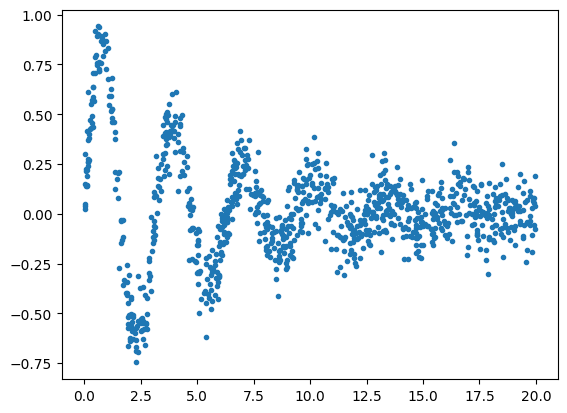

In [48]:
x = np.random.uniform(0, 20, 1000);
p = [1, 2, 0, 0, 5]
y = ff(x, p) + np.random.normal(0, 0.1, x.shape)
plt.plot(x, y, '.')

In [49]:
def ff_err(pred, data):
    return ((pred-data)**2).sum()

In [54]:
verr = []
vp = [[]]*npar

lr = 1e-6
nstep = 10000

p = [1, 2, 0, 0, 5]
err = ff_err(ff(x, p), y)
verr.append(err)
for i in range(len(vp)):
    vp[i].append(p[i])

for i in range(nstep):
    delta = 2*lr*(ff(x, p) - y)
    grad = ff_grad(x, p)

    for j in range(len(vp)):
        p[j] -= (delta * grad[j]).sum()

    err = ff_err(ff(x, p), y)
    verr.append(err)
    for i in range(len(vp)):
        vp[i].append(p[i])

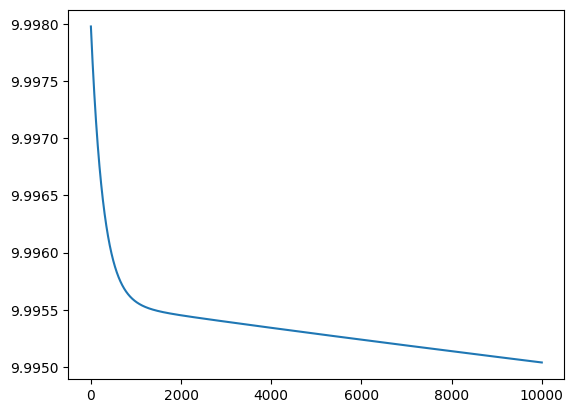

In [55]:
plt.plot(verr)

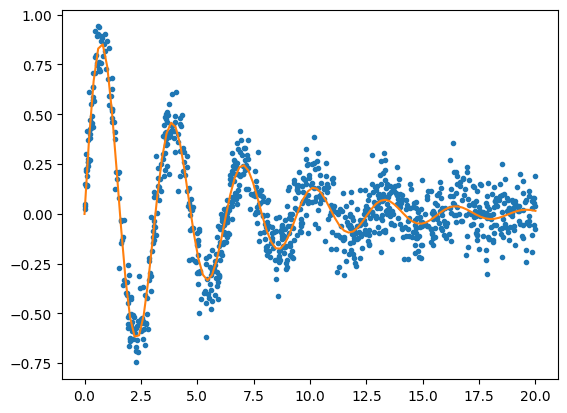

In [65]:
plt.plot(x,y,'.');
xx = np.linspace(0, 20, 100)
yy = ff(xx, p)
plt.plot(xx, yy, '-');